# TASK 1
* **(1)** Pick any image based dataset from the list, **(2)** implement the preprocessing and justify the preprocessing steps, **(3)** extract features and justify the methods used, **(4)** select features and justify the methods used. Some of this is done already in one of the previous assignments. You can reuse things. **(5)** Implement (using the selected features) one basic machine learning algorithm for classification and justify your choice 20 (without justification 10).

* Implement (using the selected features) one advanced machine learning algorithm for classification and justify your choice 20 (without justification 10). 

* Implement a CNN with hyperparameter tuning (for this you can directly use the data after the preprocessing) (30)

* Compare and Explain the results in terms of both the computation time and the performance of the classification algorithms. (30) 


## Preprocessing: 
### Augmentation


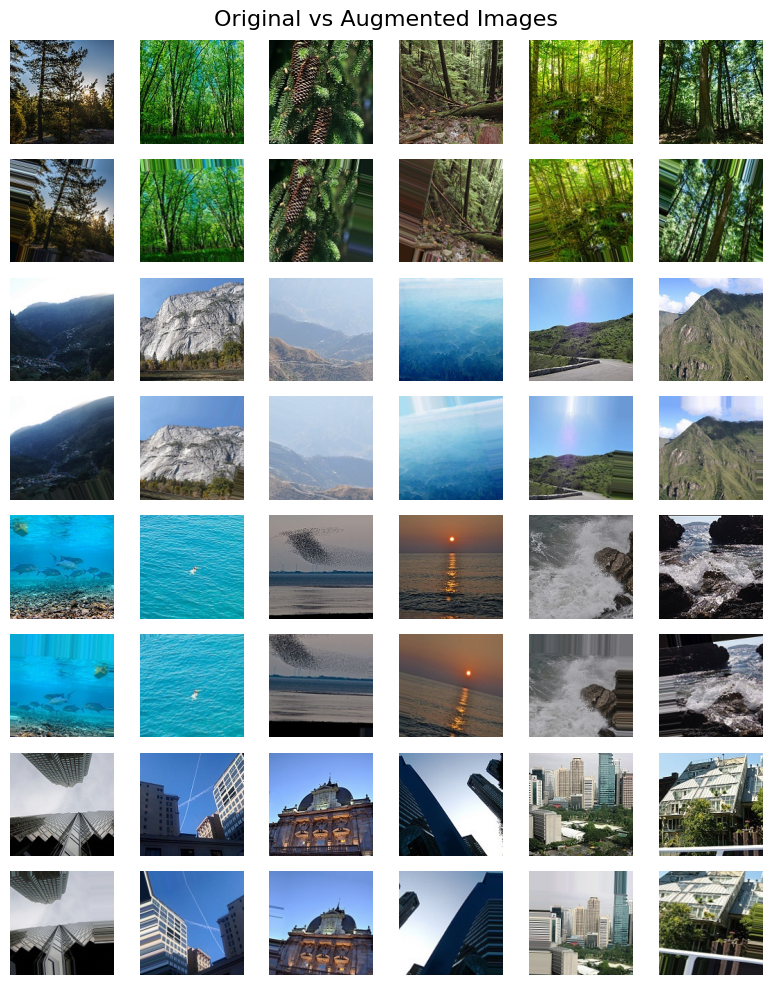

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

# Define image size and dataset path
img_height, img_width = 150, 150
path_to_images = 'Intel-Image-Subset'

# Load six images from each of four categories (adjust this as needed)
categories = os.listdir(path_to_images)[:4]  # Select the first four categories
sample_images = []
for category in categories:
    category_path = os.path.join(path_to_images, category)
    images_in_category = os.listdir(category_path)[:6]  # Select six images per category
    for img_name in images_in_category:
        img_path = os.path.join(category_path, img_name)
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
        img = tf.keras.preprocessing.image.img_to_array(img) / 255.0  # Normalize image to [0,1]
        sample_images.append(img)

# Convert sample_images to a numpy array for easy augmentation
sample_images = np.array(sample_images)

# Configure data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate augmented images
augmented_images = [datagen.random_transform(img) for img in sample_images]

# Visualization of original vs augmented images
num_categories = len(categories)
fig, axes = plt.subplots(num_categories * 2, 6, figsize=(8, 10))  # More columns and rows for tighter display
fig.suptitle("Original vs Augmented Images", fontsize=16)

for i in range(num_categories):
    # Display original and augmented images side by side
    for j in range(6):  # Display six images per category
        orig_index = i * 6 + j
        # Original images (left column for each category)
        axes[i * 2, j].imshow(sample_images[orig_index])
        axes[i * 2, j].axis('off')
        if j == 0:
            axes[i * 2, j].set_ylabel(f"{categories[i]}", rotation=0, labelpad=50, fontsize=10)
        
        # Augmented images (right column for each category)
        axes[i * 2 + 1, j].imshow(augmented_images[orig_index])
        axes[i * 2 + 1, j].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust to leave space for the main title
plt.show()


### Grayscale and normalization. 

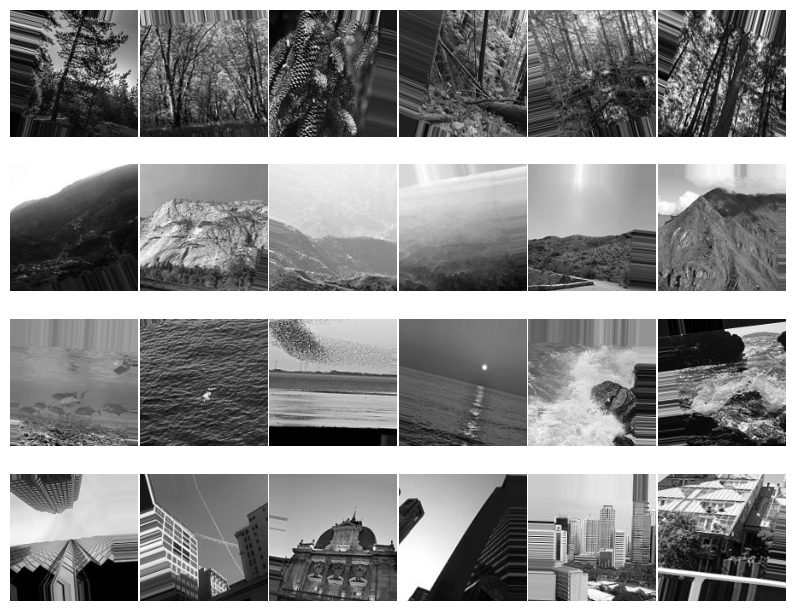

In [13]:
# Convert augmented images to grayscale and normalize them
grayscale_augmented_images = []
for img in augmented_images:
    img_grayscale = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])  # Convert to grayscale using the RGB to grayscale formula
    grayscale_augmented_images.append(img_grayscale)

# Normalize grayscale images
grayscale_augmented_images = np.array(grayscale_augmented_images) / 255.0

# Visualization of grayscale augmented images
num_categories = len(categories)
fig, axes = plt.subplots(num_categories, 6, figsize=(10, 8))

plt.subplots_adjust(wspace=0.02, hspace=0.02)

for i in range(num_categories):
    for j in range(6):
        index = i * 6 + j
        axes[i, j].imshow(grayscale_augmented_images[index], cmap='gray')  # Grayscale display
        axes[i, j].axis('off')

plt.show()

